## Chapter 1 from Bjornstad (2018): original code in R

### Libraries

In [1]:
using RCall
using DataFrames
using StatsBase: mean, std
using Plots

In [2]:
@rlibrary epimdr

### Figure 1.2

In [3]:
ccs = rcopy(R"epimdr::ccs")

,fade3,ext,size,fade,se3,se,n3,n,names
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String
1,12.12,0.645985,11740.0,5.70161,1.76187,0.85271,50.0,124.0,Abingdon
2,14.7857,0.67427,6190.0,5.904,1.91198,0.854697,42.0,125.0,Abram
3,12.0,0.50365,39610.0,4.33858,2.20656,0.736264,35.0,127.0,Accrington
4,8.46429,0.341241,65790.0,3.21552,1.18465,0.399363,28.0,116.0,Acton
5,22.7778,0.797445,4110.0,11.4868,3.71571,2.14112,36.0,76.0,Adlington
6,12.8864,0.614051,18580.0,5.9469,1.98467,0.930404,44.0,113.0,Adwick.le.Street
7,21.1818,0.885949,2690.0,14.2647,2.63138,2.04628,44.0,68.0,Aldeburgh
8,21.1951,0.850365,3722.0,11.3537,3.45003,2.03406,41.0,82.0,Alderley.Edge
9,11.4878,0.546533,38180.0,4.70866,1.34397,0.601223,41.0,127.0,Aldershot


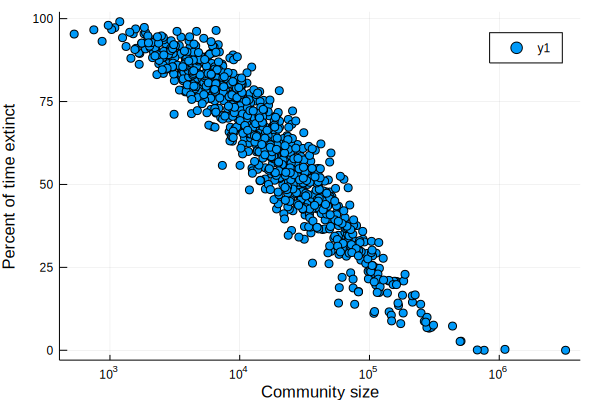

In [4]:
plot(ccs[:size], ccs[:ext]*100,
    seriestype=:scatter,
    xscale = :log10,
    xlabel = "Community size",
    ylabel = "Percent of time extinct")

### Fig 1.3a

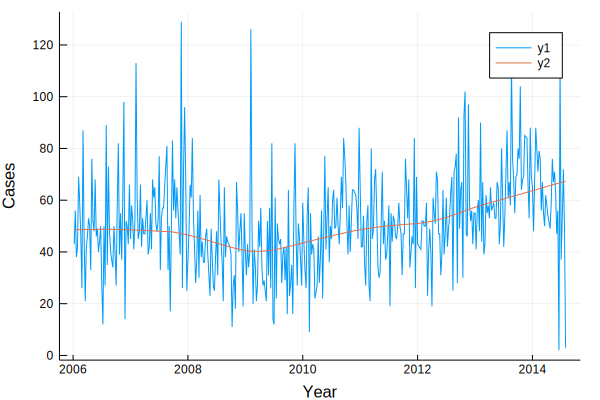

In [5]:
magono = rcopy(R"epimdr::magono")
plot(magono[:time], magono[:number], ylabel = "Cases", xlabel = "Year")
smooth = rcopy(rcall(:lowess,x=magono[:time],y=magono[:number],f=0.4))
plot!(smooth[:x],smooth[:y])

### Fig 1.3b

In [6]:
cholera = rcopy(R"epimdr::cholera")

,Year,Month,Dacca,Population
,Int64,Int64,Int64,Int64
1,1891,1,2641,2420656
2,1891,2,939,2422563
3,1891,3,905,2424470
4,1891,4,1219,2426378
5,1891,5,368,2428285
6,1891,6,78,2430192
7,1891,7,29,2432099
8,1891,8,12,2434007
9,1891,9,30,2435914


In [7]:
err(x)=1.96std(x)/sqrt(length(x))
ses = aggregate(cholera[[:Dacca,:Month]],:Month,[mean,err])
ses[:Month][1:6] = 7:12
ses[:Month][7:12] = 1:6
sort!(ses,(:Month))

,Month,Dacca_mean,Dacca_err
,Int64,Float64,Float64
1,1,35.18,8.18342
2,2,28.48,6.44006
3,3,95.58,37.4001
4,4,436.96,204.182
5,5,1062.58,316.323
6,6,1419.38,296.542
7,7,798.74,166.801
8,8,341.64,67.465
9,9,808.04,180.589


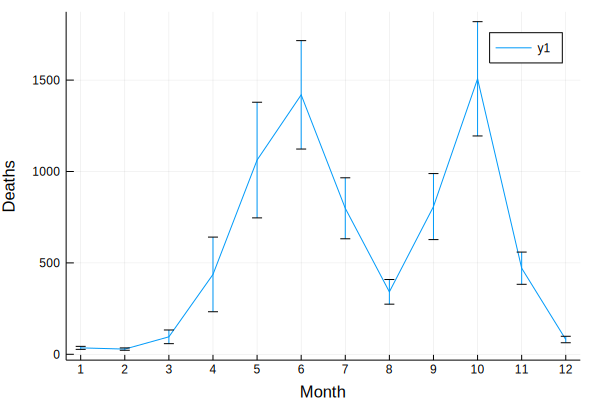

In [8]:
plot(ses[:Month],ses[:Dacca_mean],yerr=ses[:Dacca_err],xlabel="Month",xticks=1:12,ylabel="Deaths")